**1. IMPORT THƯ VIỆN CẦN THIẾT**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files

**2. ĐỌC DỮ LIỆU**

In [ ]:
df = pd.read_csv("financials_clean.csv")
print("✅ Dữ liệu:", df.shape)
df.head()

✅ Dữ liệu: (505, 38)


,symbol,name,sector,price,price_earnings,dividend_yield,earnings_share,52_week_low,52_week_high,market_cap,...,market_cap_log,profitability_ratio,dividend_flag,valuation_z__scaled,ebitda_log__scaled,profitability_ratio__scaled,52w_range__scaled,price_to_52w_high__scaled,market_cap_log__scaled,dividend_flag__scaled
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,...,25.655731,0.065224,1,0.908281,1.102991,-0.189244,-0.229478,0.269950,1.477267,0.0
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,...,23.101276,0.055734,1,0.502909,-0.632341,-0.336064,0.083849,0.112032,-0.541755,0.0
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,...,25.349425,0.056247,1,0.076988,0.812210,-0.328124,-0.395256,0.517180,1.235165,0.0
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,...,25.923895,0.056840,1,2.228956,1.186549,-0.318950,-1.790810,2.451493,1.689222,0.0
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,...,25.316018,0.057137,1,0.685735,0.800883,-0.314349,0.011210,0.435615,1.208760,0.0


**3. CHỌN CÁC BIẾN ĐẦU VÀO**

In [ ]:
features = [
    "valuation_z__scaled",
    "ebitda__scaled",
    "profitability_ratio__scaled",
    "market_cap__scaled",
    "52w_range__scaled",
    "price_to_52w_high__scaled",
    "dividend_flag__scaled",
    "price_earnings__scaled",
    "dividend_yield__scaled",
    "earnings_share__scaled",
    "price_book__scaled",
    "price_sales__scaled" ]
X = df[features]

In [ ]:
X_scaled = X.values


**4. TÌM CỤM TỐI ƯU (Elbow Method)**

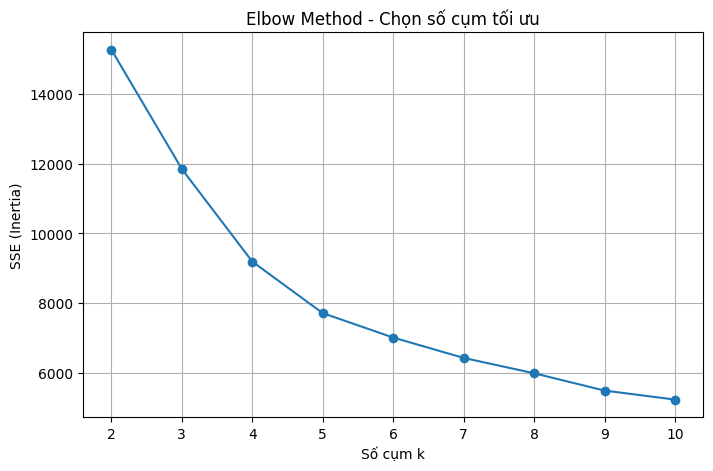

In [ ]:
sse = []
K = range(2, 11)  # kiểm tra từ 2 → 10 cụm

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, sse, marker='o')
plt.title('Elbow Method - Chọn số cụm tối ưu')
plt.xlabel('Số cụm k')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()


**5. TÍNH HỆ SỐ SILHOUTTE**

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []
K = range(2, 11)  # thử k = 2 → 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)   # X_scaled là dữ liệu đã chuẩn hóa
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)
    print(f"k = {k}, Silhouette Score = {sil:.4f}")


k = 2, Silhouette Score = 0.8671
k = 3, Silhouette Score = 0.6660
k = 4, Silhouette Score = 0.5797
k = 5, Silhouette Score = 0.5910
k = 6, Silhouette Score = 0.2383
k = 7, Silhouette Score = 0.2619
k = 8, Silhouette Score = 0.1844
k = 9, Silhouette Score = 0.2703
k = 10, Silhouette Score = 0.1860


**6. CHẠY MÔ HÌNH VỚI SỐ CỤM TỐI ƯU**

In [ ]:
# --- KMeans với k = 3 ---
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)

df["cluster"] = kmeans.fit_predict(X)   # nếu bạn dùng X_scaled thì thay X → X_scaled

# --- Tính trung bình từng biến theo cụm ---
cluster_profile = df.groupby("cluster")[features].mean().round(3)

print("📊 Trung bình đặc trưng theo cụm:")
display(cluster_profile)


📊 Trung bình đặc trưng theo cụm:


,valuation_z__scaled,ebitda__scaled,profitability_ratio__scaled,market_cap__scaled,52w_range__scaled,price_to_52w_high__scaled,dividend_flag__scaled,price_earnings__scaled,dividend_yield__scaled,earnings_share__scaled,price_book__scaled,price_sales__scaled
cluster,,,,,,,,,,,,
0,5.770,0.808,-0.486,1.909,-0.801,0.997,-0.417,8.779,-0.440,0.218,6.772,1.589
1,15.676,1.031,0.121,1.299,-0.196,0.293,-0.273,-0.262,0.253,0.876,45.702,0.623
2,0.093,0.606,0.196,0.726,-0.066,0.063,-0.155,0.048,0.075,0.218,0.251,0.266


**7. TRỰC QUAN HOÁ BẰNG PCA**

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- PCA ---
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)   # nếu dùng X_scaled thì thay X → X_scaled

df["pca1"] = pca_components[:, 0]
df["pca2"] = pca_components[:, 1]

# --- Tỷ lệ phương sai được giải thích ---
print("📌 Explained Variance Ratio (PCA1, PCA2):")
print(pca.explained_variance_ratio_)


📌 Explained Variance Ratio (PCA1, PCA2):
[0.70557585 0.11528164]


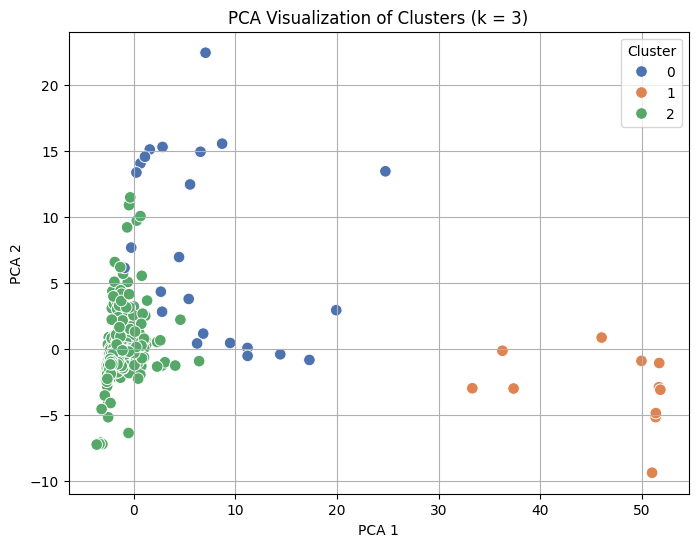

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="pca1",
    y="pca2",
    hue="cluster",
    palette="deep",
    s=70
)
plt.title("PCA Visualization of Clusters (k = 3)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

**PHÂN TÍCH ĐẶC TRƯNG TRUNG BÌNH CỦA TỪNG** **CỤM** **

In [ ]:
# --- Thống kê trung bình các biến theo từng cụm (3 cụm: 0,1,2) ---
for c in range(3):  # cụm 0, 1, 2
    print(f"\n📊 Trung bình đặc trưng của cụm {c}:")
    display(df[df["cluster"] == c][features].mean().round(3))



📊 Trung bình đặc trưng của cụm 0:


,0
valuation_z__scaled,5.770
ebitda__scaled,0.808
profitability_ratio__scaled,-0.486
market_cap__scaled,1.909
52w_range__scaled,-0.801
price_to_52w_high__scaled,0.997
dividend_flag__scaled,-0.417
price_earnings__scaled,8.779
dividend_yield__scaled,-0.440
earnings_share__scaled,0.218



📊 Trung bình đặc trưng của cụm 1:


,0
valuation_z__scaled,15.676
ebitda__scaled,1.031
profitability_ratio__scaled,0.121
market_cap__scaled,1.299
52w_range__scaled,-0.196
price_to_52w_high__scaled,0.293
dividend_flag__scaled,-0.273
price_earnings__scaled,-0.262
dividend_yield__scaled,0.253
earnings_share__scaled,0.876



📊 Trung bình đặc trưng của cụm 2:


,0
valuation_z__scaled,0.093
ebitda__scaled,0.606
profitability_ratio__scaled,0.196
market_cap__scaled,0.726
52w_range__scaled,-0.066
price_to_52w_high__scaled,0.063
dividend_flag__scaled,-0.155
price_earnings__scaled,0.048
dividend_yield__scaled,0.075
earnings_share__scaled,0.218


In [8]:
# --- Số lượng công ty trong từng cụm ---
cluster_counts = df["cluster"].value_counts().sort_index()
print("📊 Số lượng công ty theo từng cluster:")
print(cluster_counts)


📊 Số lượng công ty theo từng cluster:
cluster
0     24
1     11
2    470
Name: count, dtype: int64


In [7]:
# --- Thống kê số lượng công ty theo sector trong từng cụm ---
cluster_sector_summary = df.groupby(["cluster", "sector"])["symbol"].count().reset_index()
cluster_sector_summary.rename(columns={"symbol": "company_count"}, inplace=True)

# Sắp xếp theo cluster và số lượng giảm dần
cluster_sector_summary = cluster_sector_summary.sort_values(["cluster", "company_count"], ascending=[True, False])

# Hiển thị kết quả
for c in range(3):  # cụm 0,1,2
    print(f"\n📊 Cluster {c}:")
    display(cluster_sector_summary[cluster_sector_summary["cluster"] == c])



📊 Cluster 0:


,cluster,sector,company_count
5,0,Information Technology,7
1,0,Energy,5
0,0,Consumer Discretionary,4
3,0,Health Care,3
2,0,Financials,2
4,0,Industrials,2
6,0,Real Estate,1



📊 Cluster 1:


,cluster,sector,company_count
7,1,Consumer Discretionary,4
8,1,Consumer Staples,3
9,1,Financials,1
10,1,Health Care,1
11,1,Industrials,1
12,1,Information Technology,1



📊 Cluster 2:


,cluster,sector,company_count
13,2,Consumer Discretionary,76
16,2,Financials,65
18,2,Industrials,64
19,2,Information Technology,62
17,2,Health Care,57
21,2,Real Estate,32
14,2,Consumer Staples,31
23,2,Utilities,28
15,2,Energy,27
20,2,Materials,25


In [5]:

from sklearn.cluster import KMeans

# Áp dụng KMeans với 3 cụm
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled) # Now X_scaled is defined

# Xem công ty và cụm
df[["symbol", "name", "sector", "cluster"]].head(10)

,symbol,name,sector,cluster
0,MMM,3M Company,Industrials,2
1,AOS,A.O. Smith Corp,Industrials,2
2,ABT,Abbott Laboratories,Health Care,2
3,ABBV,AbbVie Inc.,Health Care,2
4,ACN,Accenture plc,Information Technology,2
5,ATVI,Activision Blizzard,Information Technology,2
6,AYI,Acuity Brands Inc,Industrials,2
7,ADBE,Adobe Systems Inc,Information Technology,2
8,AAP,Advance Auto Parts,Consumer Discretionary,2
9,AMD,Advanced Micro Devices Inc,Information Technology,0


In [9]:
# --- Xem 100 công ty đầu tiên, sắp xếp theo cluster ---
company_cluster = df[["symbol", "name", "sector", "cluster"]].sort_values(by="cluster")
company_cluster.head(100)


,symbol,name,sector,cluster
21,ALGN,Align Technology,Health Care,0
30,AMZN,Amazon.com Inc,Consumer Discretionary,0
475,VRTX,Vertex Pharmaceuticals Inc,Health Care,0
463,UPS,United Parcel Service,Industrials,0
403,CRM,Salesforce.com,Information Technology,0
...,...,...,...,...
93,CBOE,CBOE Holdings,Financials,2
92,CAT,Caterpillar Inc.,Industrials,2
91,CCL,Carnival Corp.,Consumer Discretionary,2
90,KMX,Carmax Inc,Consumer Discretionary,2
